In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sahte Veri Oluşturma

In [4]:
data = {
    "Yıl" : np.arange(2010,2021),
    "Satış" : np.random.randint(100 , 500, 11),
    "Masraf" : np.random.randint(50, 400, 11)
}

df = pd.DataFrame(data)

regions = ["Kuzey" , "Güney" , "Doğu", "Batı"]

df["Bölge"] = np.random.choice(["Kuzey" ,"Güney", "Doğu" ,"Batı"], df.shape[0])

df

,Yıl,Satış,Masraf,Bölge
0,2010,431,165,Batı
1,2011,323,206,Güney
2,2012,312,115,Batı
3,2013,381,98,Kuzey
4,2014,323,278,Güney
5,2015,212,57,Kuzey
6,2016,418,203,Güney
7,2017,480,276,Batı
8,2018,196,191,Doğu
9,2019,179,55,Doğu


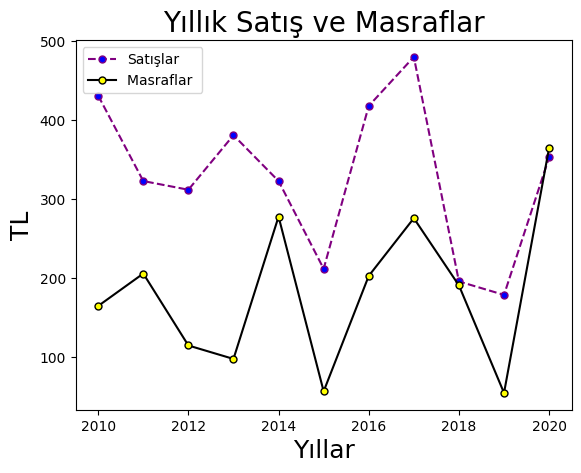

In [5]:
plt.plot(df["Yıl"], df["Satış"],
          label ="Satışlar",linestyle = "--",
          marker = "o" , 
          color = "purple",
           markerfacecolor = "blue",markersize=5  ) #marker ile sivri noktolara o getirdik


# SORU :  Yıl ve Masrafı aynı plota ekleyin
# Marker : "x"

plt.plot(df["Yıl"], df["Masraf"],
          label ="Masraflar ",linestyle = "-",
          marker = "o" ,
            color = "black",
           markerfacecolor = "yellow",markersize=5 ) #marker ile sivri noktolara o getirdik

# plt.xticks([2010, 2012, 2014, 2016, 2018, 2020], ["Yıl 2010", "Yıl 2012", "Yıl 2014", "Yıl 2016", "Yıl 2018", "Yıl 2020"])
plt.title("Yıllık Satış ve Masraflar", fontsize = 20)
plt.xlabel("Yıllar", fontsize = 18)
plt.ylabel("TL", fontsize = 18)



plt.legend(loc="upper left") # label(etiket)'in yerini sol üst tarafa çektik
plt.show()

# plt.bar()

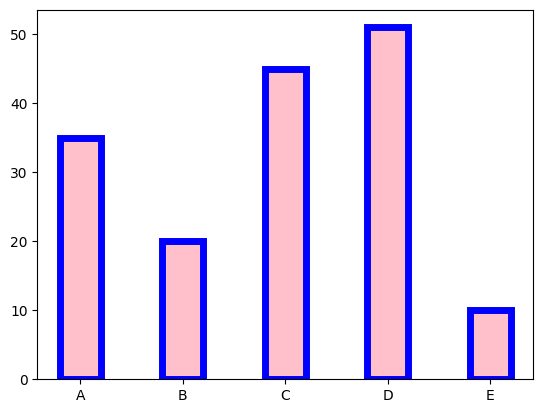

In [6]:
categories = ["A", "B", "C" , "D", "E"]
values = [35,20,45,51,10]

plt.bar(categories, values, color= "pink",
        width=0.4,edgecolor="blue",
        linewidth = 5) # plt.bar() Sutün grafiği çizer
# width sutünların genişliğini kontrol eder
# edgecolor sutünların etrafını çevreler
# linewidth = sutünların etrafını çevreleyen bölgenin kalınlığını ayarlar
plt.show()

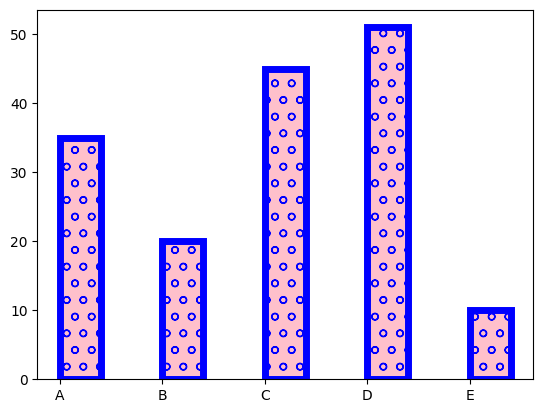

In [7]:
categories = ["A", "B", "C" , "D", "E"]
values = [35,20,45,51,10]

plt.bar(categories, values, color= "pink",
        width=0.4,edgecolor="blue",
        linewidth = 5 , align="edge", hatch="o") 
#align="edge" diyerek barları kaydırdık
#hatch ile barların içene şekiller çizdik
plt.show()

## Soru: Aşağıda verilen veri kümesindeki Şehir ve Nüfus değerlerini kullanarak bir barplot çiziniz:

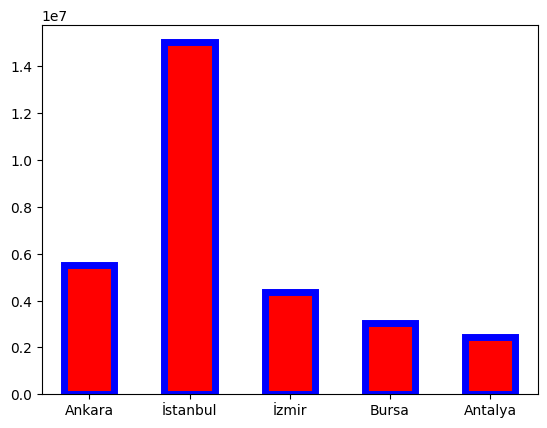

In [8]:
data_dict = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'], 
         'Nüfus': [5503985, 15029231, 4367251, 3056120, 2444535] }

# scientific notation
plt.bar(data_dict["Şehir"], data_dict["Nüfus"], color = "red",
        width = 0.5, edgecolor="blue", linewidth=5)
plt.show()

In [9]:
sales_by_region = df.groupby("Bölge")["Satış"].sum()
sales_by_region

Bölge
Batı     1223
Doğu      375
Güney    1417
Kuzey     593
Name: Satış, dtype: int32

In [10]:
sales_by_region.index

Index(['Batı', 'Doğu', 'Güney', 'Kuzey'], dtype='object', name='Bölge')

C:\Users\erena\AppData\Local\Temp\ipykernel_31036\3039265093.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


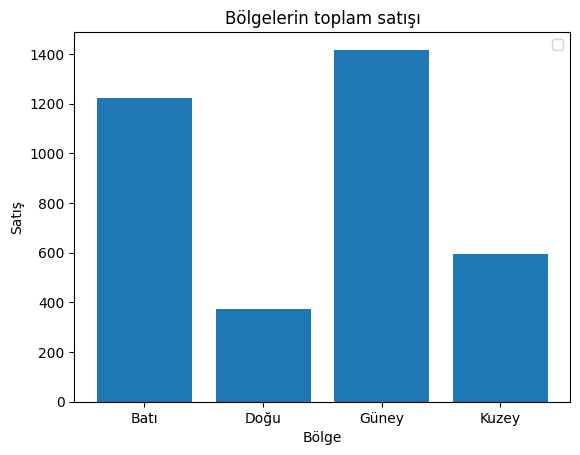

In [11]:
plt.bar(sales_by_region.index,sales_by_region.values)

plt.xlabel("Bölge")
plt.ylabel("Satış")
plt.title("Bölgelerin toplam satışı")

plt.legend()
plt.show()

## Histogram Mantığı

In [12]:
sales_bins = pd.cut(df["Satış"], bins=10) # pd.cut() Eşit genişlikte (sabit aralıklı) gruplar oluşturur.
sales_bins  

0       (419.8, 449.9]
1       (299.4, 329.5]
2       (299.4, 329.5]
3       (359.6, 389.7]
4       (299.4, 329.5]
5       (209.1, 239.2]
6       (389.7, 419.8]
7       (449.9, 480.0]
8     (178.699, 209.1]
9     (178.699, 209.1]
10      (329.5, 359.6]
Name: Satış, dtype: category
Categories (10, interval[float64, right]): [(178.699, 209.1] < (209.1, 239.2] < (239.2, 269.3] < (269.3, 299.4] ... (359.6, 389.7] < (389.7, 419.8] < (419.8, 449.9] < (449.9, 480.0]]

In [13]:
sales_bins.value_counts()

Satış
(299.4, 329.5]      3
(178.699, 209.1]    2
(209.1, 239.2]      1
(329.5, 359.6]      1
(389.7, 419.8]      1
(359.6, 389.7]      1
(419.8, 449.9]      1
(449.9, 480.0]      1
(239.2, 269.3]      0
(269.3, 299.4]      0
Name: count, dtype: int64

In [14]:
sales_bins = pd.qcut(df["Satış"], q=10)  #pd.qcut()	Eşit sayıda eleman içeren gruplar oluşturur.
sales_bins

ValueError: Bin edges must be unique: Index([179.0, 196.0, 212.0, 312.0, 323.0, 323.0, 353.0, 381.0, 418.0, 431.0,
       480.0],
      dtype='float64', name='Satış').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
bin_count = sales_bins.value_counts()
bin_count

Satış
(133.999, 139.0]    2
(139.0, 171.0]      1
(171.0, 207.0]      1
(207.0, 232.0]      1
(232.0, 283.0]      1
(283.0, 357.0]      1
(357.0, 363.0]      1
(363.0, 381.0]      1
(381.0, 446.0]      1
(446.0, 451.0]      1
Name: count, dtype: int64

In [ ]:
(101.999 + 112.0 )/ 2

106.9995

In [ ]:
bin_middles = [(interval.left + interval.right) / 2  for interval in bin_count.index]
bin_middles

[np.float64(136.4995),
 np.float64(155.0),
 np.float64(189.0),
 np.float64(219.5),
 np.float64(257.5),
 np.float64(320.0),
 np.float64(360.0),
 np.float64(372.0),
 np.float64(413.5),
 np.float64(448.5)]

<BarContainer object of 10 artists>

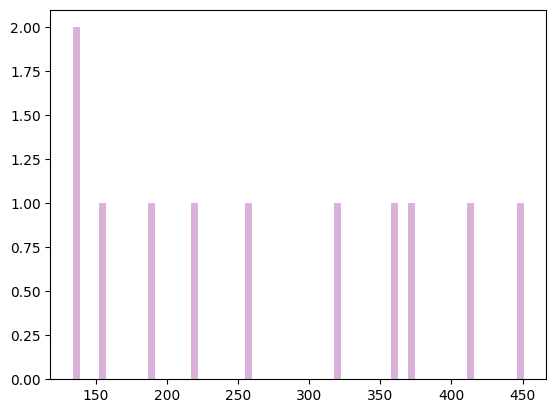

In [ ]:
plt.bar(bin_middles,bin_count.values, width=5,
        alpha = 0.3, color = "purple")

# plt.subplot()

+ plt.subplot(nrows, ncols, index)

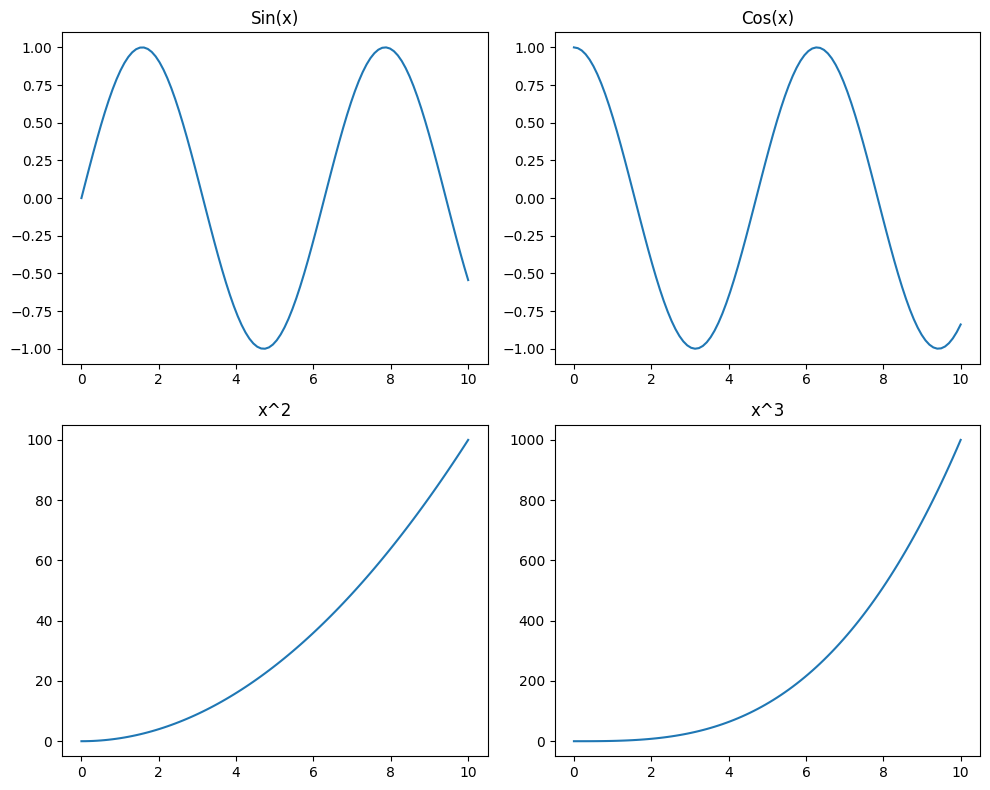

In [ ]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 8))  # Figürü oluştur (Boyut: 10x8 inç)

# 1. Grafik (Sinüs Eğrisi)
plt.subplot(2, 2, 1)  # 2 satır, 2 sütun, 1. grafik
plt.plot(x, np.sin(x))
plt.title("Sin(x)")

# 2. Grafik (Kosinüs Eğrisi)
plt.subplot(2, 2, 2)  # 2 satır, 2 sütun, 2. grafik
plt.plot(x, np.cos(x))
plt.title("Cos(x)")

# 3. Grafik (x^2 Fonksiyonu)
plt.subplot(2, 2, 3)  # 2 satır, 2 sütun, 3. grafik
plt.plot(x, x**2)
plt.title("x^2")

# 4. Grafik (x^3 Fonksiyonu)
plt.subplot(2, 2, 4)  # 2 satır, 2 sütun, 4. grafik
plt.plot(x, x**3)
plt.title("x^3")

plt.tight_layout()  # Grafikleri sıkıştırarak düzenle
plt.show()


## plt.hist()

In [ ]:
# 🔹 Histogram Nedir?
# Histogram, veri dağılımını incelemek için kullanılan bir grafiktir. 
# Bir veri kümesindeki değerlerin hangi aralıklarda daha yoğun olduğunu gösterir.

In [ ]:
# X ekseni veri değerlerini (aralıkları) gösterir.
# Y ekseni her aralıkta kaç tane veri olduğunu (frekans) gösterir.
# Çubuk sayısı (bins) : Veri kümesinin kaç gruba ayrılacağını belirler.
# bins = 10 : Veri kümesi 10 gruba ayrılacak.
# Çubuk genişliği her veri grubunun bölgesi ve veri aralığını,
# çubuk yüksekliği ise her veri grubundaki veri miktarını(Frekans) temsil eder.

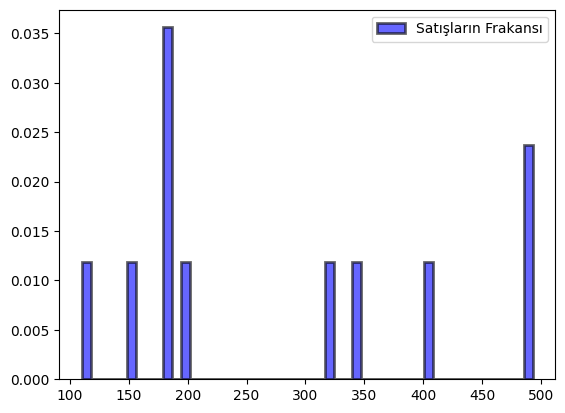

In [ ]:
plt.hist(df["Satış"], bins=50, color="blue", edgecolor="black" , alpha=0.6,
         label="Satışların Frakansı",histtype="stepfilled" , density=True,
         linewidth=2)
# bins	Veriyi kaç bölüme ayıracağını belirler
# histtype	Histogram türünü belirler (Örnek: 'bar', 'step', 'stepfilled')
# density	True olursa, yoğunluk belirtir , false olursa frekans belirtir.
plt.legend()
plt.show()

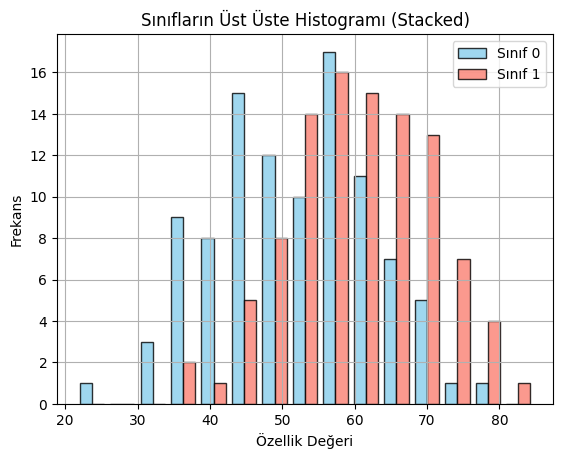

In [18]:
# Örnek veriler (iki farklı sınıfa ait değerler)
class_0 = np.random.normal(loc=50, scale=10, size=100)
class_1 = np.random.normal(loc=60, scale=10, size=100)

# Histogram (stacked)
plt.hist([class_0, class_1],
         bins=15,
         color=['skyblue', 'salmon'],
         edgecolor='black',
         label=['Sınıf 0', 'Sınıf 1'],
         alpha=0.8)

plt.title("Sınıfların Üst Üste Histogramı (Stacked)")
plt.xlabel("Özellik Değeri")
plt.ylabel("Frekans")
plt.legend()
plt.grid(True)
plt.show()


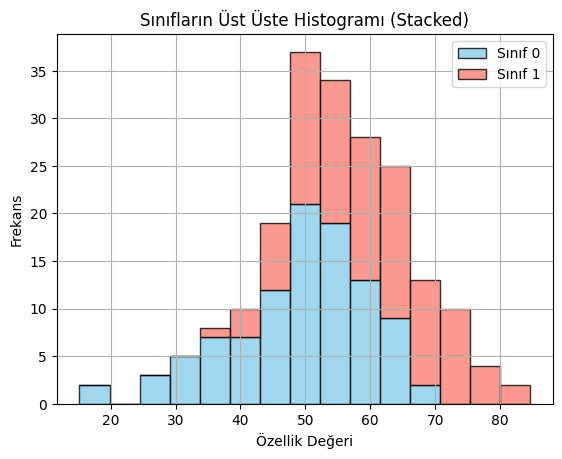

In [ ]:
# Örnek veriler (iki farklı sınıfa ait değerler)
class_0 = np.random.normal(loc=50, scale=10, size=100)
class_1 = np.random.normal(loc=60, scale=10, size=100)

# Histogram (stacked)
plt.hist([class_0, class_1],
         bins=15,
         stacked=True,
         color=['skyblue', 'salmon'],
         edgecolor='black',
         label=['Sınıf 0', 'Sınıf 1'],
         alpha=0.8)

plt.title("Sınıfların Üst Üste Histogramı (Stacked)")
plt.xlabel("Özellik Değeri")
plt.ylabel("Frekans")
plt.legend()
plt.grid(True)
plt.show()

# stacked=True sayesinde, her bin'deki değerler toplanarak üst üste çizilir.
# Böylece her sınıfın katkısı net bir şekilde görünür.
# Özellikle sınıf dengesizliği, sınıf ayrımı gibi şeyleri gözlemlemek için çok kullanılır.

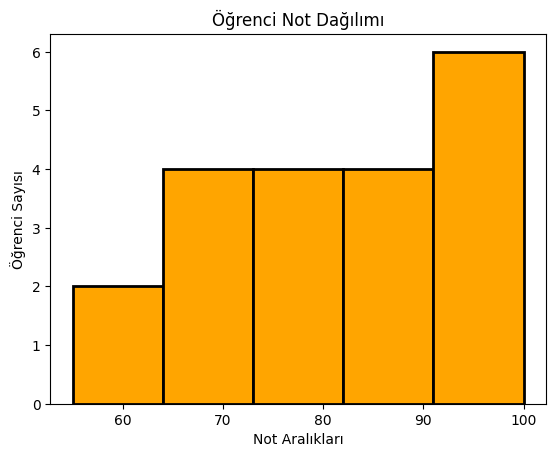

In [ ]:
# Öğrencilerin notları
notlar = [55, 60, 65, 70, 70, 72, 73, 75, 75, 80, 82, 85, 88, 90, 92, 93, 95, 95, 98, 100]

plt.hist(notlar, bins=5, color='orange', edgecolor='black',
         linewidth=2)

plt.xlabel('Not Aralıkları')
plt.ylabel('Öğrenci Sayısı')
plt.title('Öğrenci Not Dağılımı')
# ✅ Çıkan Grafiğin Yorumu:

# X ekseni → Not aralıkları (örneğin 50-60, 60-70 vs.).
# Y ekseni → Kaç öğrencinin o not aralığında olduğunu gösterir.
# En yüksek çubuk → En fazla öğrencinin olduğu not aralığıdır.


plt.show()


# plt.hist() ve plt.bar Fonk. Farkı

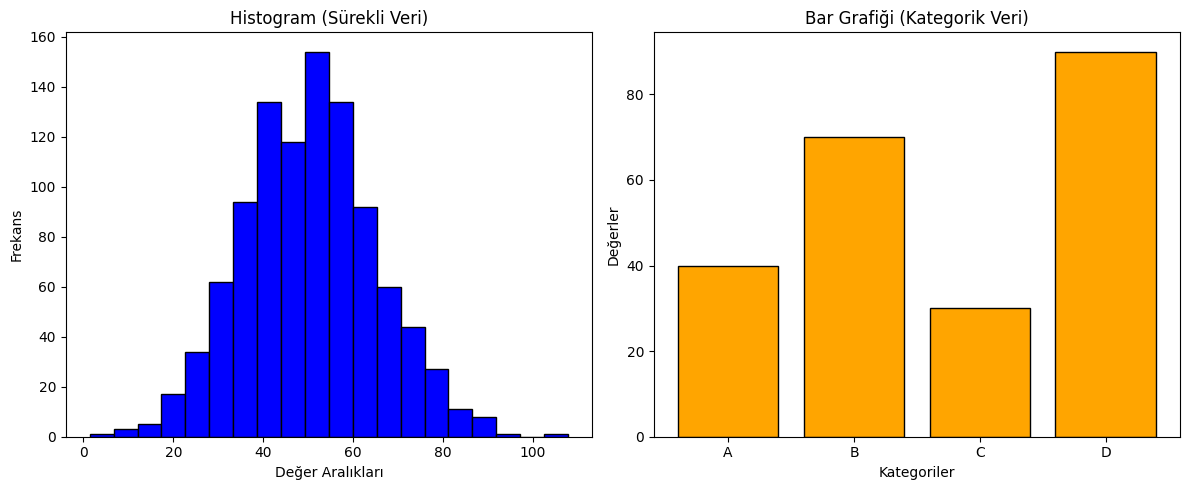

In [ ]:
np.random.seed(42)
veri = np.random.normal(50, 15, 1000)  


kategoriler = ['A', 'B', 'C', 'D']
değerler = [40, 70, 30, 90]

plt.figure(figsize=(12, 5))

# Histogram (Sol taraf)
plt.subplot(1, 2, 1)
plt.hist(veri, bins=20, color='blue', edgecolor='black')
plt.title("Histogram (Sürekli Veri)")
plt.xlabel("Değer Aralıkları")
plt.ylabel("Frekans")

# Bar Chart (Sağ taraf)
plt.subplot(1, 2, 2)
plt.bar(kategoriler, değerler, color='orange', edgecolor='black')
plt.title("Bar Grafiği (Kategorik Veri)")
plt.xlabel("Kategoriler")
plt.ylabel("Değerler")

plt.tight_layout()
plt.show()


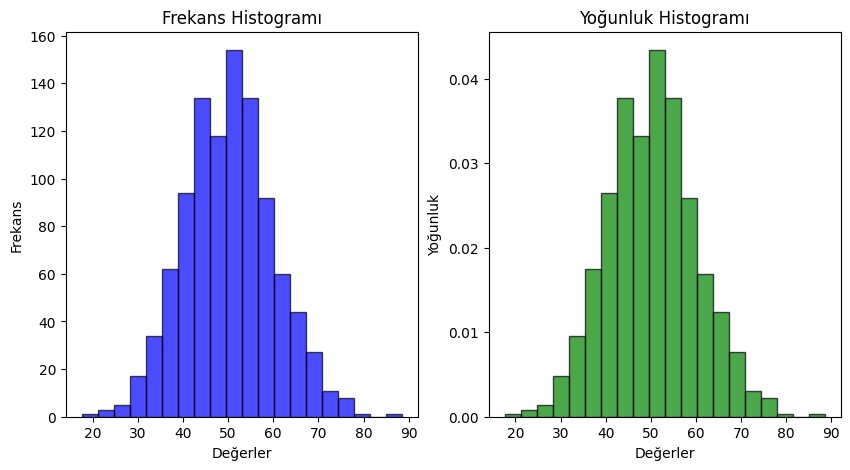

In [ ]:
# Rastgele veri oluştur (Normal dağılım)
np.random.seed(42)
veri = np.random.normal(loc=50, scale=10, size=1000)  
# loc → (Ortalama, μ) Dağılımın merkezi.

# scale → (Standart sapma, σ) Dağılımın yayılma miktarı.

# size → Üretilecek sayıların boyutu (tek bir sayı, bir dizi, matris vb.).



# Histogramları çiz
plt.figure(figsize=(10, 5))

# Frekans histogramı (varsayılan)
plt.subplot(1, 2, 1) 
plt.hist(veri, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Frekans Histogramı")
plt.xlabel("Değerler")
plt.ylabel("Frekans")

# Yoğunluk histogramı (density=True)
plt.subplot(1, 2, 2)
plt.hist(veri, bins=20, color='green', alpha=0.7, edgecolor='black',
          density=True)
plt.title("Yoğunluk Histogramı")
plt.xlabel("Değerler")
plt.ylabel("Yoğunluk")

plt.show()


## plt.hist() Örneği

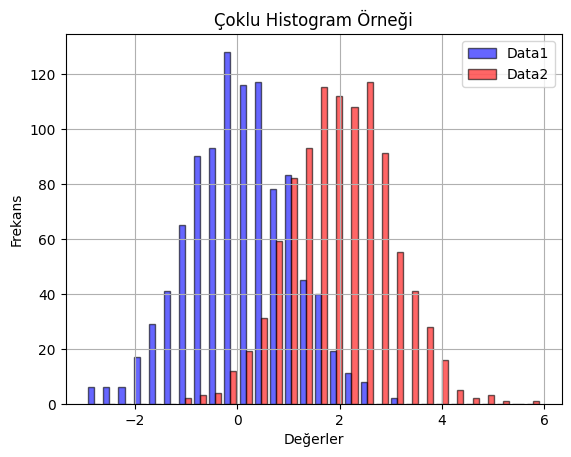

In [ ]:
data1 = np.random.randn(1000)  # Normal dağılıma sahip ilk veri
data2 = np.random.randn(1000) + 2  # İkinci veri, ortalaması farklı

plt.hist([data1, data2], bins=30,
          color=['blue', 'red'],
            edgecolor='black', alpha=0.6,
            label=['Data1', 'Data2'])

plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Çoklu Histogram Örneği')
plt.legend()  # Etiketleri göster
plt.grid(True) # Izgara ekle

plt.show()


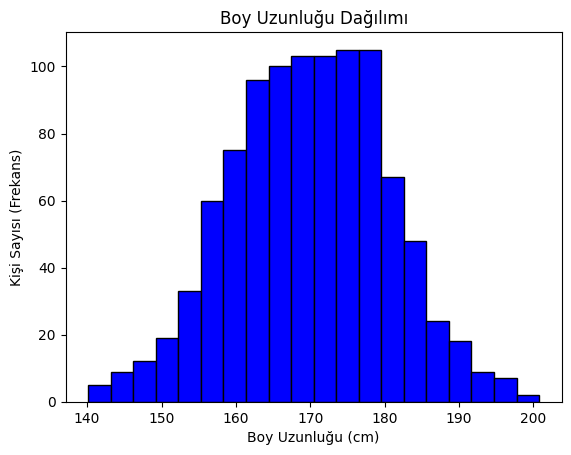

In [ ]:
# 1000 kişinin boy uzunluğunu simüle edelim (ortalama 170 cm, standart sapma 10 cm)
boy_uzunluklari = np.random.normal(170, 10, 1000)

# Histogram çiz
plt.hist(boy_uzunluklari, bins=20, color="blue", edgecolor="black")

# Ekseni etiketleyelim
plt.xlabel("Boy Uzunluğu (cm)")
plt.ylabel("Kişi Sayısı (Frekans)")
plt.title("Boy Uzunluğu Dağılımı")

plt.show()



<!-- Bir histogram iki eksenden oluşur:

✅ X Ekseni (Yatay - Bin Aralıkları):
Veri setinin bölündüğü aralıkları (bins) gösterir.
Örneğin, 1000 kişinin boy uzunluklarını ölçtüğünüzde, X ekseni farklı boy uzunluğu aralıklarını (örneğin 150-160 cm, 160-170 cm gibi) temsil eder.
Bunlar otomatik olarak belirlenir veya bins parametresiyle ayarlanır.


✅ Y Ekseni (Dikey - Frekans veya Yoğunluk):
Her bin içinde kaç tane veri olduğunu gösterir.
Örneğin, 150-160 cm aralığında 50 kişi varsa, o aralığa karşılık gelen çubuk yüksekliği 50 olur.
Varsayılan olarak, frekans kullanılır, ancak density=True kullanırsanız yoğunluk (oran) hesaplanır. -->


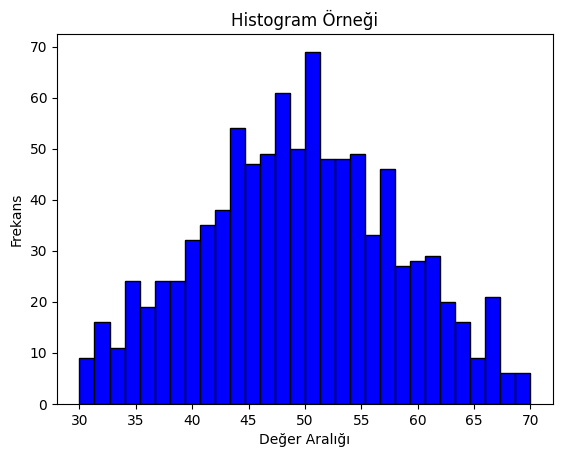

In [ ]:
# Rastgele 1000 veri noktası üret (normal dağılım)
data = np.random.randn(1000) * 10 + 50  

# Histogram çizimi
plt.hist(data, bins=30, range=(30, 70), color='blue', edgecolor='black')

# range(30,70) arasındaki değerleri gösterir

# Grafik başlık ve etiketler
plt.title("Histogram Örneği")
plt.xlabel("Değer Aralığı")
plt.ylabel("Frekans")

# Grafiği göster
plt.show()
